In [1]:
import json
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [3]:
# Open data file
d15 = pd.read_csv('~/Desktop/Mortality/2015_data.csv', nrows=10**6, dtype=object)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

## IDs used in this script

'education_2003_revision'
* 1:8th grade or less
* 2:9 - 12th grade, no diploma
* 3:high school graduate or GED completed
* 4:some college credit, but no degree
* 5:Associate degree
* 6:Bachelor’s degree
* 7:Master’s degree
* 8:Doctorate or professional degree
* 9:Unknown

'sex'
* M:Male
* F:Female

'education_reporting_flag'
* 1:2003 revision of education item on certificate

'39_cause_recode'
* 017:Alzheimer's disease (G30)

'race'
* 01:White
* 02:Black

In [4]:
d15 = d15[(d15.detail_age_type=='1') & (d15.education_reporting_flag=='1')]
# get rid of strange age values
d15 = d15[d15.detail_age!='999']
# Let's take a look at the variables and where there is possibly missing data
# d15.count()

## Effect of education on when Alzheimer's kills you

In [5]:
# Let's make a function for predicting the day of your death. Fun!!!
def predict_day_of_death(df, filters, plot_color, line_label):
        
    for cat,val in filters:
        df = df[df[cat]==val]
    
    # run kernel density estimation and plot it
    try:
        h = sns.kdeplot(df.detail_age.astype('int32'), shade=True, label=line_label, color=plot_color, cut=0)
    except ZeroDivisionError:
        print 'Oops, number of records is ' + str(len(df))
        return  
    
    # extract line info
    xy = h.get_lines()[len(h.get_lines())-1].get_data()
    # get day of death
    dod = max(enumerate(xy[1]), key=(lambda x: x[1]))
    day_of_death = xy[0][int(dod[0])]
    
    # autoscale plot
    h.autoscale(enable=True)
    
    print '{0} will most likely die at {1} years old.'.format(line_label, day_of_death)
    
    return day_of_death

Alzheimers No High School will most likely die at 89.2913385827 years old.
Alzheimers No GED will most likely die at 89.6535433071 years old.
Alzheimers, GED will most likely die at 90.0551181102 years old.
Alzheimers, College, No degree will most likely die at 91.1023622047 years old.
Alzheimers, Associates will most likely die at 89.157480315 years old.
Alzheimers, Bachelors will most likely die at 88.6377952756 years old.
Alzheimers, Masters will most likely die at 88.9527559055 years old.
Alzheimers, PhD will most likely die at 91.2440944882 years old.


Text(25,0.03,u'Proportion of deaths')

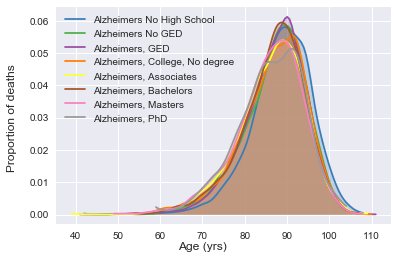

In [6]:
filt1 = zip(['education_2003_revision','39_cause_recode'],['1','17'])
filt2 = zip(['education_2003_revision','39_cause_recode'],['2','17'])
filt3 = zip(['education_2003_revision','39_cause_recode'],['3','17'])
filt4 = zip(['education_2003_revision','39_cause_recode'],['4','17'])
filt5 = zip(['education_2003_revision','39_cause_recode'],['5','17'])
filt6 = zip(['education_2003_revision','39_cause_recode'],['6','17'])
filt7 = zip(['education_2003_revision','39_cause_recode'],['7','17'])
filt8 = zip(['education_2003_revision','39_cause_recode'],['8','17'])

palette = plt.get_cmap('Set1')

dd1 = predict_day_of_death(d15, filt1, palette(1), 'Alzheimer''s No High School')
dd2 = predict_day_of_death(d15, filt2, palette(2), 'Alzheimer''s No GED')
dd3 = predict_day_of_death(d15, filt3, palette(3), 'Alzheimer''s, GED')
dd4 = predict_day_of_death(d15, filt4, palette(4), 'Alzheimer''s, College, No degree')
dd5 = predict_day_of_death(d15, filt5, palette(5), 'Alzheimer''s, Associate''s')
dd6 = predict_day_of_death(d15, filt6, palette(6), 'Alzheimer''s, Bachelor''s')
dd7 = predict_day_of_death(d15, filt7, palette(7), 'Alzheimer''s, Master''s')
dd8 = predict_day_of_death(d15, filt8, palette(8), 'Alzheimer''s, PhD')

plt.text(70, -0.01, 'Age (yrs)', ha='center', va='center')
plt.text(25, 0.03, 'Proportion of deaths', ha='center', va='center', rotation='vertical')

Across all demographics, there doesn't appear to be any relationship between the level of education and the age at which Alzheimer's kills you. We might hypothesize from this that mental activity does not slow down Alzheimer's, but this makes the rather glaring assumption that mental activity is correlated with academic acheivement. Regardless, another interesting question is whether increased education is related to the probability of dying from Alzheimer's (compared to all other forms of death). 

## Effect of education on the probability of dying from Alzheimer's

In [7]:
# First, make a function for answering the general question:
# Among [population], what is the effect of [filters] on probability of [cause_of_death]?
def death_prob(df, population, filters, cause_of_death):
    
    for cat,val in population:
        df = df[df[cat]==val]
    
    pop_count = len(df)
    
    for cat,val in filters:
        df = df[df[cat]==val]
    
    death_count = len(df[df[cause_of_death[0][0]]==cause_of_death[0][1]])
    
    prob_of_death = float(death_count) / float(pop_count)
    
    return prob_of_death

Text(0.5,1.02,u"\nRelationship between education and probability of Alzheimer's")

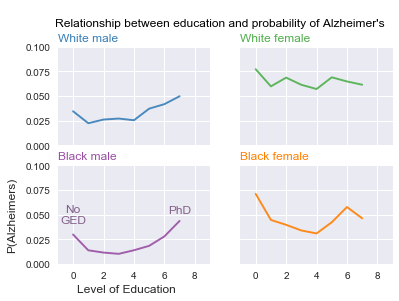

In [21]:
pod = list()
edu_level = ['1','2','3','4','5','6','7','8']
races = ['01','01','02','02']
sexes = ['M','F','M','F']
titles = ['White male','White female','Black male','Black female']

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

# initialize figure
h = plt.figure()
    
# multiple line plot
num=0
for r,s,t in zip(races, sexes, titles):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2, 2, num)
     
    pod=[]
    # Plot the lineplot
    for el in edu_level:
        pod.append(death_prob(d15, zip(['education_2003_revision', 'race', 'sex'],[el, r, s]), [],\
                          zip(['39_cause_recode'],['17'])))
    
    plt.plot(pod, color=palette(num), linewidth=1.9, alpha=0.9)
 
    # Same limits for everybody!
    plt.xlim(-1,9)
    plt.ylim(0,0.1)
 
    # Not ticks everywhere
    if num in [1,2] :
        plt.tick_params(labelbottom='off')
    if num not in [1,3] :
        plt.tick_params(labelleft='off')
    if num in [3] :
        plt.text(3.5, -0.025, 'Level of Education', ha='center', va='center')
        plt.text(-4, 0.05, 'P(Alzheimer''s)', ha='center', va='center', rotation='vertical')
        plt.text(7, 0.055, 'PhD', ha='center', va='center', color=sns.xkcd_rgb["dusty purple"])
        plt.text(0, 0.05, 'No\nGED', ha='center', va='center', color=sns.xkcd_rgb["dusty purple"])
    # Add title
    plt.title(t, loc='left', fontsize=12, fontweight=0, color=palette(num) )


# general title
plt.suptitle("\nRelationship between education and probability of Alzheimer's", fontsize=12, fontweight=1, color='black', y=1.02)


In these plots, the level of education ranges from 0 (i.e., didn't start high school) to 7 (i.e., PhD).

There appears to be a U-shaped function describing the relationship between education and the probability of dying from Alzheimer's (females are the exception because they have an equally high probability of dying from Alzheimer's across all levels of education). Note that this is not the same as the probability of developing Alzheimer's. In one sense, it isn't surprsing that the probability of dying from Alzheimer's increases with the level of education -- people who live long enough to get a PhD are perhaps more likely to live long enough to die from Alzheimer's. The surprising (and surprisingly consistent) trend is that you are more likely to die from Alzheimer's if you didn't start or finish high school. 

If you want to check if the increase in dying at low education levels is a real difference, use pd.crosstab to set up a chi2 test.
chi2_contingency(pandas.crosstab(test_df.var2, test_df.var1))

In [23]:
# h.savefig('Edu_Alz.png')